추정된 Beta 평균: [ 2.66778003 -1.46778286]
추정된 Sigma^2 평균: 1.1390680038353622


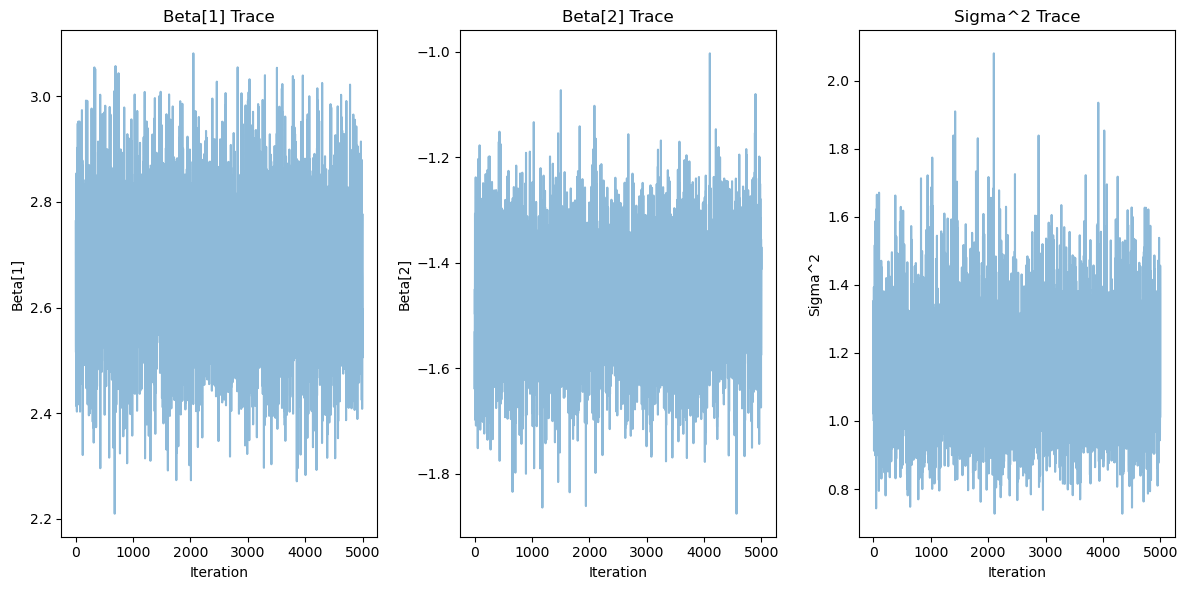

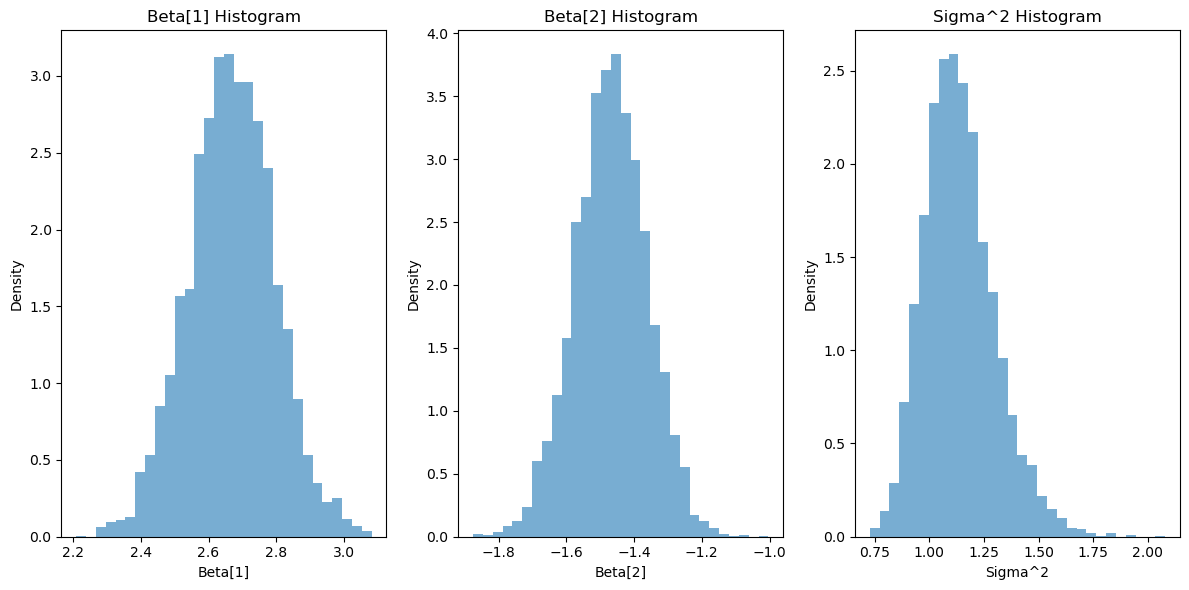

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성 (모의 데이터)
np.random.seed(42)
n = 100  # 데이터 포인트 수
p = 2    # 독립 변수 수 (베타의 차원)

# 실제 계수와 데이터 생성
true_beta = np.array([2.5, -1.3])  # 실제 계수
X = np.random.normal(0, 1, size=(n, p))  # 독립 변수
sigma2_true = 1.0  # 실제 오차 분산
epsilon = np.random.normal(0, np.sqrt(sigma2_true), size=n)  # 오차
y = X @ true_beta + epsilon  # 종속 변수

# 사전 분포 설정
beta_prior_mean = np.zeros(p)
beta_prior_cov = np.eye(p) * 10  # 사전 분산: 대각행렬
alpha_prior = 2  # Inverse-Gamma 분포의 shape
beta_prior = 1   # Inverse-Gamma 분포의 scale

# Gibbs Sampling
def gibbs_sampling(X, y, n_iter=5000):
    n, p = X.shape
    beta_samples = np.zeros((n_iter, p))
    sigma2_samples = np.zeros(n_iter)
    
    # 초기값 설정
    beta = np.zeros(p)
    sigma2 = 1.0
    
    for t in range(n_iter):
        # 1. Beta 조건부 분포 샘플링 (정규분포)
        beta_cov = np.linalg.inv(np.linalg.inv(beta_prior_cov) + (X.T @ X) / sigma2)
        beta_mean = beta_cov @ (X.T @ y) / sigma2
        beta = np.random.multivariate_normal(beta_mean, beta_cov)
        
        # 2. Sigma^2 조건부 분포 샘플링 (Inverse-Gamma)
        residuals = y - X @ beta
        alpha_post = alpha_prior + n / 2
        beta_post = beta_prior + 0.5 * residuals.T @ residuals
        sigma2 = 1 / np.random.gamma(alpha_post, 1 / beta_post)
        
        # 샘플 저장
        beta_samples[t] = beta
        sigma2_samples[t] = sigma2
    
    return beta_samples, sigma2_samples

# 실행
n_iter = 5000
beta_samples, sigma2_samples = gibbs_sampling(X, y, n_iter)

# 결과 분석
beta_mean_est = beta_samples.mean(axis=0)
sigma2_mean_est = sigma2_samples.mean()

print(f"추정된 Beta 평균: {beta_mean_est}")
print(f"추정된 Sigma^2 평균: {sigma2_mean_est}")

# 시각화
plt.figure(figsize=(12, 6))

# Beta 샘플 시각화
for i in range(p):
    plt.subplot(1, p+1, i+1)
    plt.plot(beta_samples[:, i], alpha=0.5)
    plt.title(f"Beta[{i+1}] Trace")
    plt.xlabel("Iteration")
    plt.ylabel(f"Beta[{i+1}]")

# Sigma^2 샘플 시각화
plt.subplot(1, p+1, p+1)
plt.plot(sigma2_samples, alpha=0.5)
plt.title("Sigma^2 Trace")
plt.xlabel("Iteration")
plt.ylabel("Sigma^2")

plt.tight_layout()
plt.show()

# 히스토그램
plt.figure(figsize=(12, 6))
for i in range(p):
    plt.subplot(1, p+1, i+1)
    plt.hist(beta_samples[:, i], bins=30, density=True, alpha=0.6)
    plt.title(f"Beta[{i+1}] Histogram")
    plt.xlabel(f"Beta[{i+1}]")
    plt.ylabel("Density")

plt.subplot(1, p+1, p+1)
plt.hist(sigma2_samples, bins=30, density=True, alpha=0.6)
plt.title("Sigma^2 Histogram")
plt.xlabel("Sigma^2")
plt.ylabel("Density")

plt.tight_layout()
plt.show()